Note: data1 is 80% trainig data and data2 is 20% testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("WPI all comodities.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,108.0
2013-02-01,108.4
2013-03-01,108.6
2013-04-01,108.6
2013-05-01,108.6
...,...
2022-01-01,143.8
2022-02-01,145.3
2022-03-01,148.9


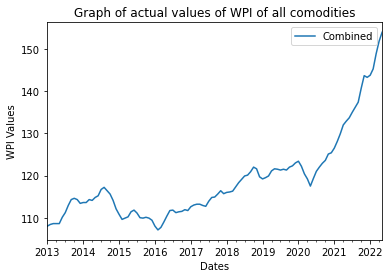

In [10]:
data.plot()
plt.title('Graph of actual values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [11]:
data1 = data.iloc[0:96]
data1

,Combined
Date,
2013-01-01,108.0
2013-02-01,108.4
2013-03-01,108.6
2013-04-01,108.6
2013-05-01,108.6
...,...
2020-08-01,122.0
2020-09-01,122.9
2020-10-01,123.6


## Checking whether the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
adftest

(-0.7928013680504858,
 0.8212274711136816,
 3,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 188.96054106899348)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [13]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.8212274711136816


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [14]:
data1["Combined first difference"]=data1-data1.shift(1)
data1

,Combined,Combined first difference
Date,,
2013-01-01,108.0,NaN
2013-02-01,108.4,0.4
2013-03-01,108.6,0.2
2013-04-01,108.6,0.0
2013-05-01,108.6,0.0
...,...,...
2020-08-01,122.0,1.0
2020-09-01,122.9,0.9
2020-10-01,123.6,0.7


In [15]:
adftest = adfuller(data1["Combined first difference"].dropna())
adftest

(-5.691897536253945,
 8.035507125531477e-07,
 2,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 185.65651866003776)

Now data is stationary

In [16]:
data1["Combined 12 difference"] = data1['Combined']-data1['Combined'].shift(12)
data1["Combined 12 difference"]

Date
2013-01-01    NaN
2013-02-01    NaN
2013-03-01    NaN
2013-04-01    NaN
2013-05-01    NaN
             ... 
2020-08-01    0.5
2020-09-01    1.6
2020-10-01    1.6
2020-11-01    2.8
2020-12-01    2.4
Name: Combined 12 difference, Length: 96, dtype: float64

## ACF and PACF Graph

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

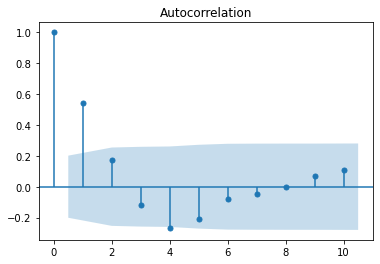

In [18]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data1["Combined first difference"].dropna(),lags=10)

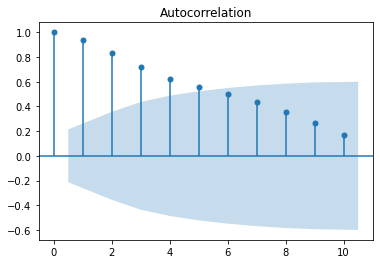

In [19]:
acf12 = plot_acf(data1["Combined 12 difference"].dropna(),lags=10)

from acf12_second graph we get the value of q = 5

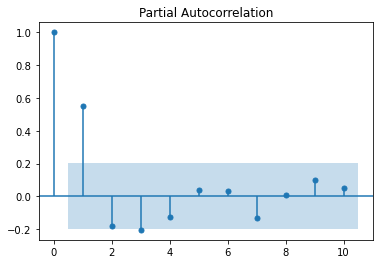

In [20]:
pacf = plot_pacf(data1["Combined first difference"].dropna(),lags=10)

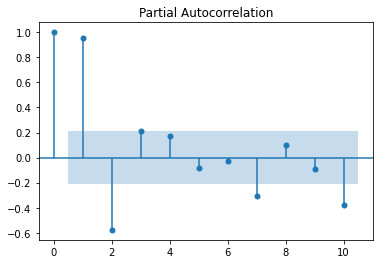

In [21]:
pacf12 = plot_pacf(data1["Combined 12 difference"].dropna(),lags=10)

From PACF we get the value of p = 5

## Sarima model fitting

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_SARIMA = SARIMAX(data1["Combined"],order=(3,1,3),seasonal_order = (3,0,3,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [24]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                   96
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 12)   Log Likelihood                 -94.560
Date:                            Fri, 26 Aug 2022   AIC                            215.121
Time:                                    14:39:24   BIC                            248.321
Sample:                                01-01-2013   HQIC                           228.536
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4472      0.374      1.195      0.232      -0.286       1.181
ar.L2         -0.6766      0.284     -2.381      0.017      -1.233      -0.120
ar.L3          0.0271      0.288      0.094      0.925      -0.538       0.592
ma.L1          0.1557      0.358      0.435      0.664      -0.546       0.857
ma.L2          0.8691      0.224      3.876      0.000       0.430       1.309
ma.L3          0.3954      0.311      1.273      0.203      -0.214       1.004
ar.S.L12      -0.0217      0.607     -0.036      0.971      -1.211       1.167
ar.S.L24      -0.1924      0.795     -0.242      0.809      -1.751       1.366
ar.S.L36      -0.2872      0.708     -0.406      0.685      -1.675       1.101
ma.S.L12       0.1368      2.529      0.054      0.957      -4.819       5.093
ma.S.L24       0.1964      3.239      0.061      0.952      -6.152       6.545
ma.S.L36       0.9147      4.378      0.209      0.834      -7.665       9.495
sigma2         0.3184      1.229      0.259      0.796      -2.091       2.728
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.86   Prob(JB):                         0.42
Heteroskedasticity (H):               1.38   Skew:                             0.27
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [26]:
from datetime import datetime,timedelta
data1['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2020,12,1))
data1['pred_Sarima']

Date
2013-01-01      0.000000
2013-02-01    108.000049
2013-03-01    108.624671
2013-04-01    108.670207
2013-05-01    108.533528
                 ...    
2020-08-01    122.342654
2020-09-01    122.472475
2020-10-01    123.307331
2020-11-01    124.234137
2020-12-01    126.232658
Name: pred_Sarima, Length: 96, dtype: float64

## Residuals

In [27]:
data1['residuals'] = data1["Combined"]-data1['pred_Sarima']
data1['residuals']

Date
2013-01-01    108.000000
2013-02-01      0.399951
2013-03-01     -0.024671
2013-04-01     -0.070207
2013-05-01      0.066472
                 ...    
2020-08-01     -0.342654
2020-09-01      0.427525
2020-10-01      0.292669
2020-11-01      0.865863
2020-12-01     -0.832658
Name: residuals, Length: 96, dtype: float64

In [28]:
data1

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,108.0,NaN,NaN,0.000000,108.000000
2013-02-01,108.4,0.4,NaN,108.000049,0.399951
2013-03-01,108.6,0.2,NaN,108.624671,-0.024671
2013-04-01,108.6,0.0,NaN,108.670207,-0.070207
2013-05-01,108.6,0.0,NaN,108.533528,0.066472
...,...,...,...,...,...
2020-08-01,122.0,1.0,0.5,122.342654,-0.342654
2020-09-01,122.9,0.9,1.6,122.472475,0.427525
2020-10-01,123.6,0.7,1.6,123.307331,0.292669


<AxesSubplot:ylabel='Density'>

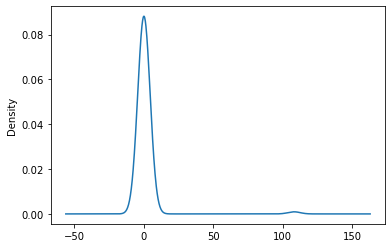

In [29]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [30]:
from scipy import stats
stats.shapiro(data1["residuals"])

ShapiroResult(statistic=0.1114014983177185, pvalue=2.0057195188818085e-21)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.974389 > 0.05 

so residuals are normally distributed

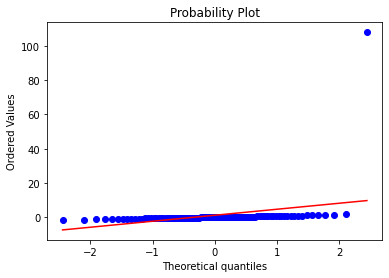

In [31]:
import pylab
from scipy import stats
stats.probplot(data1["residuals"],dist='norm',plot=pylab)
pylab.show()


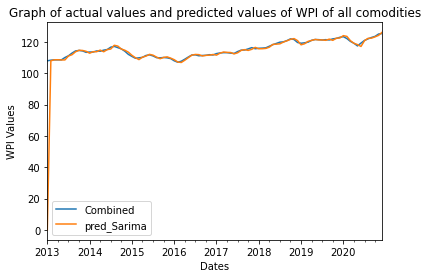

In [32]:
data1[['Combined','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

#### Original dataset and our predicted values are nearby same

## Prediction from Jan 2021 to May 2022

In [33]:
data2 = data.iloc[96:113,0:1]
data2

,Combined
Date,
2021-01-01,126.5
2021-02-01,128.1
2021-03-01,129.9
2021-04-01,132.0
2021-05-01,132.9
2021-06-01,133.7
2021-07-01,135.0
2021-08-01,136.2
2021-09-01,137.4


In [34]:
pred_Sarima1 = model_SARIMA_fit.predict(start = datetime(2021,1,1),end = datetime(2022,5,1))
pred_Sarima1

2021-01-01    126.041688
2021-02-01    125.949505
2021-03-01    125.203440
2021-04-01    125.246896
2021-05-01    125.581600
2021-06-01    126.350406
2021-07-01    126.990957
2021-08-01    127.320097
2021-09-01    127.784315
2021-10-01    128.221918
2021-11-01    128.030627
2021-12-01    127.163441
2022-01-01    127.180798
2022-02-01    127.577491
2022-03-01    127.690276
2022-04-01    127.828369
2022-05-01    127.769234
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
data2['pred_Sarima1'] = pred_Sarima1

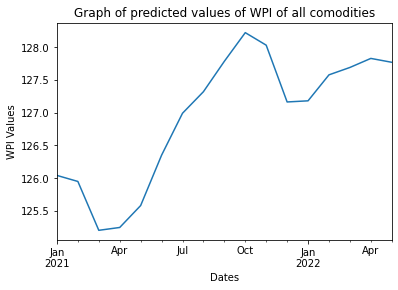

In [36]:
pred_Sarima1.plot()
plt.title('Graph of predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [37]:
data['pred_Sarima1'] = pred_Sarima1

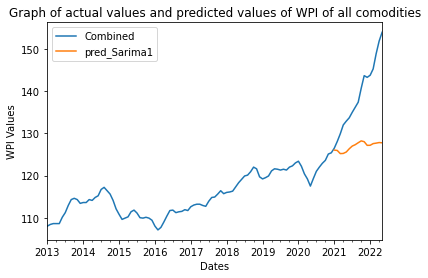

In [38]:
data[['Combined','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

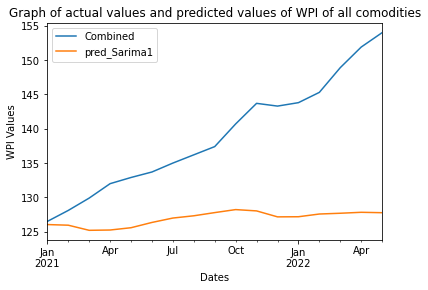

In [39]:
data2[['Combined','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

## Future prediction from June 2022 to May 2023

In [40]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,6,1),end = datetime(2023,5,1))
pred_Sarima2

2022-06-01    127.497595
2022-07-01    127.389030
2022-08-01    127.782946
2022-09-01    127.718233
2022-10-01    127.927442
2022-11-01    127.752835
2022-12-01    127.988528
2023-01-01    127.703446
2023-02-01    126.759390
2023-03-01    125.993246
2023-04-01    125.402262
2023-05-01    124.938546
Freq: MS, Name: predicted_mean, dtype: float64

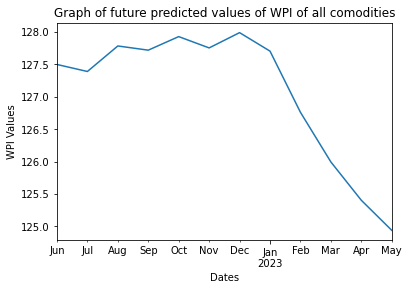

In [41]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [42]:
import numpy as np
# Mean Squared Error
MSE = np.square(np.subtract(data2["Combined"],data2["pred_Sarima1"])).mean()

In [43]:
MSE

199.1050298147098